# The Poetry Project

In this notebook I want to conduct time series analysis using my poetry data. My data is not extensive but at least it holds almost three months of records. I am excited to see how a time series analysis would look like with the data I recorded about my life and poetry writing habits.

### Contents of this notebook

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

C:\Users\veren\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\veren\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### 2. Importing dataframe

In [2]:
poetry = pd.read_excel(r'C:\Users\veren\Python Data\persoenliche-projekte\The Poetry Project\02 Data\Prepared Data\poetry-project-data-complete-medcat.xlsx', index_col=False)

In [3]:
poetry.head()

,Unnamed: 0,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,...,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,all poems together,no of poems per day,meditation length category
0,0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,...,It slithers Leaves from my chest When the sun ...,0,0,28,0,0,28,It slithers Leaves from my chest When the sun ...,1,medium meditation
1,1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11,38,42,91,The touch of your skin Is a meandering Forest ...,3,long meditation
2,2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,...,0,0,0,0,0,0,0,0 0 0,0,long meditation
3,3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,medium meditation
4,4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,...,The deep yearning to learn something about you...,0,0,13,0,0,13,The deep yearning to learn something about you...,1,long meditation


### 3. Data imputation

In [4]:
# Dropping the index column

poetry.drop(poetry.columns[0], axis = 1, inplace = True)

In [5]:
df = poetry.drop(columns = ['Day of the week', 'Weather', 'Food', 'Kind of music', 'Type of reading', 'poem', 'additional poem 1', 'additional poem 2', 'cleaned poem', 'cleaned additional poem 1', 'cleaned additional poem 2', 'all poems together', 'meditation length category', 'Sport', 'Meditation', 'Dance', 'Music', 'Guitar', 'Reading', 'Mood in the evening', 'sleep quality night before', 'mindfulness', 'totalwords poem', 'totalwords additional poem 1', 'totalwords additional poem 2', 'no of poems per day'])

In [6]:
pd.options.display.max_rows = None
df.head(91)

,Date,totalwords all poems
0,2021-08-06,28
1,2021-08-07,91
2,2021-08-08,0
3,2021-08-09,0
4,2021-08-10,13
5,2021-08-11,26
6,2021-08-12,18
7,2021-08-13,0
8,2021-08-14,0
9,2021-08-15,24


In [7]:
# Turning the "Date"-column into an index column

data = df.set_index('Date')

In [8]:
data.columns

Index(['totalwords all poems'], dtype='object')

In [9]:
data.shape

(91, 1)

In [10]:
type(data)

pandas.core.frame.DataFrame

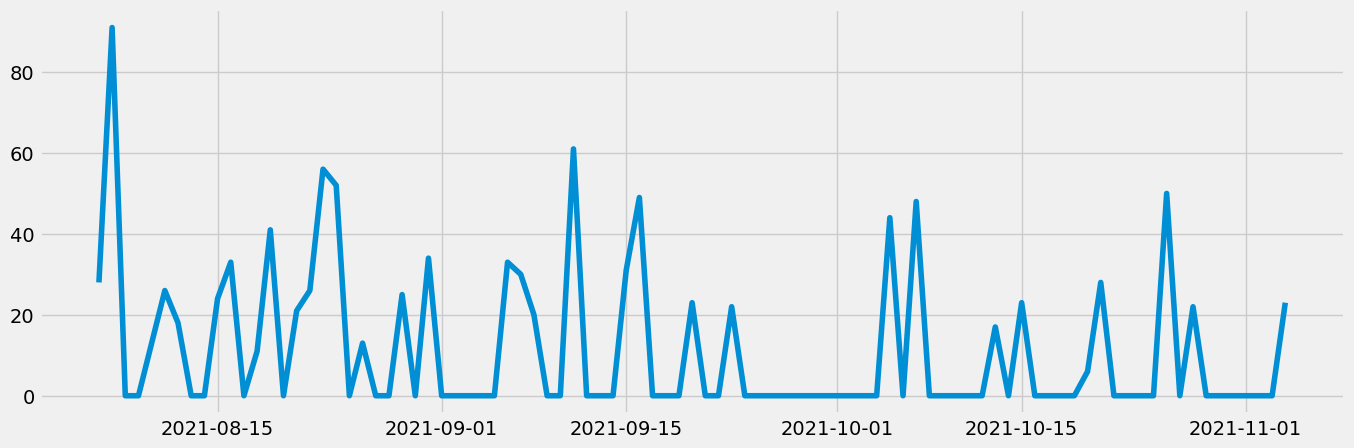

In [11]:
# Plotting the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [12]:
# Transforming the "Date" column of df into a "Datetime" column
# it was easier to use df because it has a "normal" index that I can more easily replace with datetime

from datetime import datetime

In [13]:
df['datetime'] = pd.to_datetime(df['Date']) # Create a datetime column from "Date"
df = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df.head(91)

,totalwords all poems
datetime,
2021-08-06,28
2021-08-07,91
2021-08-08,0
2021-08-09,0
2021-08-10,13
2021-08-11,26
2021-08-12,18
2021-08-13,0
2021-08-14,0


### 4. Decomposition of the data for time series analysis

In [14]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [15]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

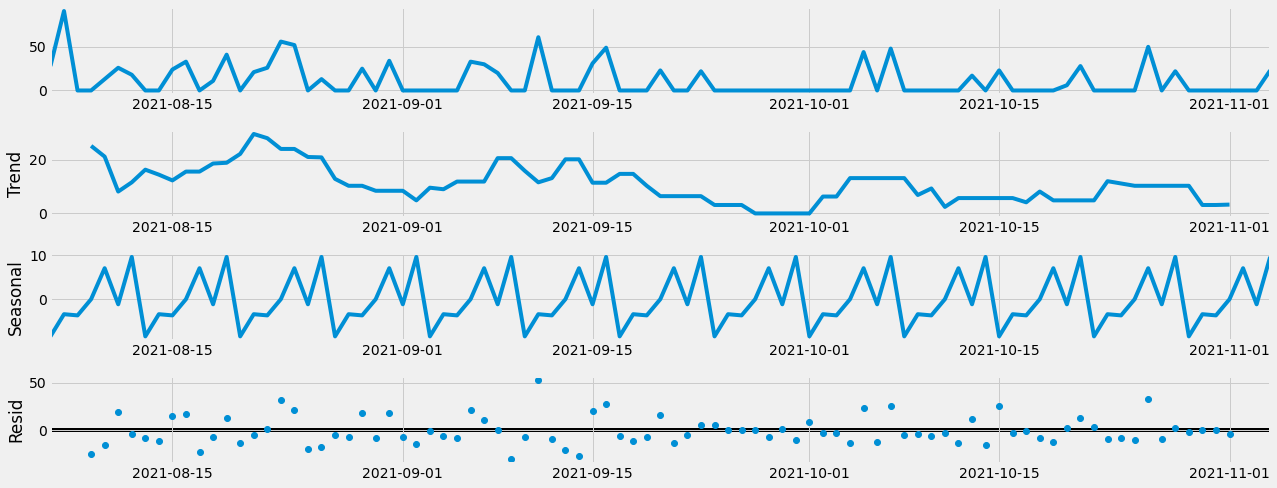

In [16]:
# Plotting the separate components

decomposition.plot()
plt.show()

The residual line is not continuous but as it only shows noise this doesn't need to be further investigated.

The level and trend appear the dissimilar, so the data has some noise.

The seasonal line shows that the data has seasonality, but because the data only spans two month this can be ignored.

### 5. Test for stationarity

In [18]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['totalwords all poems'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.007068e+00
p-value                        6.269893e-15
Number of Lags Used            0.000000e+00
Number of Observations Used    9.000000e+01
Critical Value (1%)           -3.505190e+00
Critical Value (5%)           -2.894232e+00
Critical Value (10%)          -2.584210e+00
dtype: float64


In order to determine the results of a statistical hypothesis test, one has to compare the test statistic to the critical value of the corresponding significance level. If the test statistic is larger than the critical value, one can’t reject the null hypothesis. The null hypothesis states that there is no relationship between the measured phenomenon "totalwords all poems" (the dependent variable) and the independent variable ("time"). If the test statistic is smaller, then one can reject the null hypothesis. In this case, let’s say we are using a significance level of 5 percent. You’d need to look at the “Critical Value (5%)” in the results, which, here, has a value of -2.894232. This is smaller than the test statistic, which is -9.007068, which means that we can’t reject the null hypothesis.

What does this mean? It means that there is a unit root in the data, and the data is non-stationary. A unit root is a stochastic trend in a time series. If a time series has a unit root, it shows a systematic pattern that is unpredictable. This means we have to try to get the data more stationary.

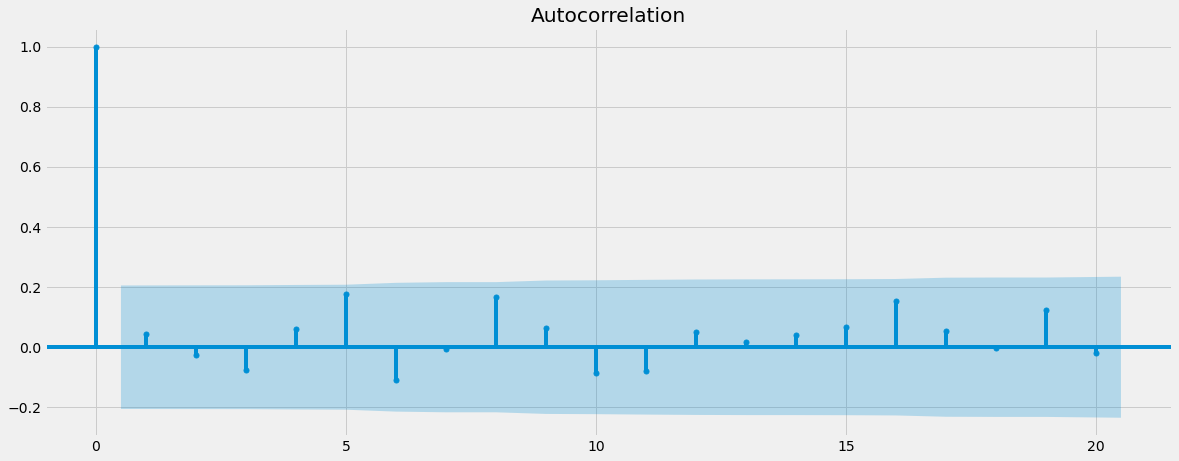

In [19]:
# Checking out autocorrelations with a plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means there are lags that are significantly correlated with each other. Thus, it can be deduced that the data is non-stationary. We have a huge lag at point zero because there have been a lot of days without poems. Let's see how we can deal with this.

### 06. Stationarizing the data

In [20]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

In [21]:
data_diff.dropna(inplace = True) # Here, the missing values that came about as a result of the differencing are removed. 
# They need to be removed or the Dickey-Fuller test won't run.

In [22]:
data_diff.head()

,totalwords all poems
datetime,
2021-08-07,63.0
2021-08-08,-91.0
2021-08-09,0.0
2021-08-10,13.0
2021-08-11,13.0


In [23]:
data_diff.tail()

,totalwords all poems
datetime,
2021-10-31,0.0
2021-11-01,0.0
2021-11-02,0.0
2021-11-03,0.0
2021-11-04,23.0


In [24]:
data_diff.columns

Index(['totalwords all poems'], dtype='object')

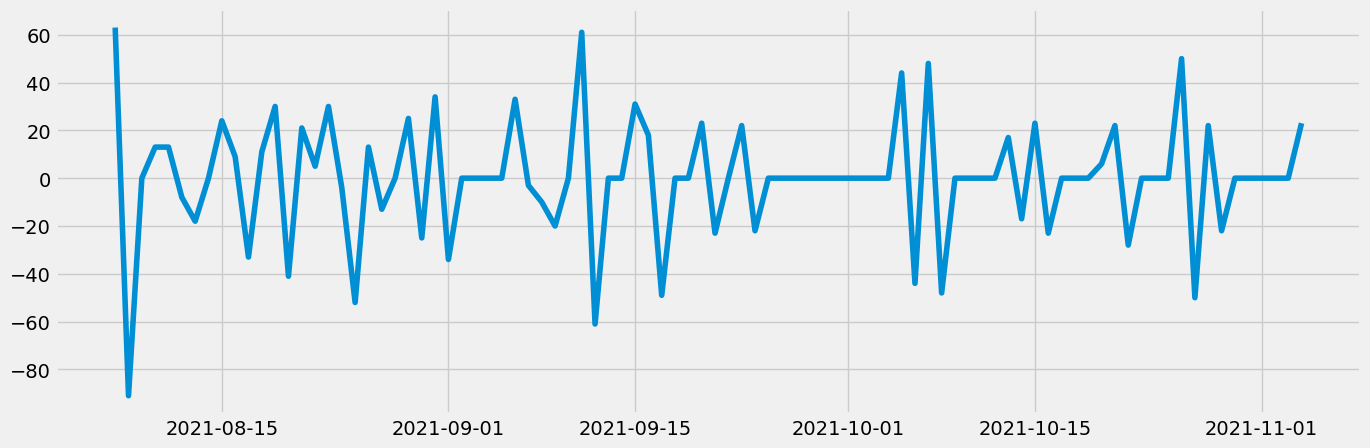

In [25]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

The values on the y-axis have changed. This is because, by stationarizing data, one effectively gets rid of the data’s trend. The trend is what gave the data its downward slope. Without it, there is more of a horizontal line and more visible patterns.

In [26]:
# Running the Dickey-Fuller-Test again

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.958109e+00
p-value                        9.315013e-10
Number of Lags Used            6.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


As we have already said above, we are using a significance level of 5 percent. So we need to look at the “Critical Value (5%)” in the results, which, now, has a value of -2.897048. This is still smaller than the test statistic, which is now -6.958109, which means that we can’t reject the null hypothesis and the data is still non-stationary. However, we got a little bit closer.

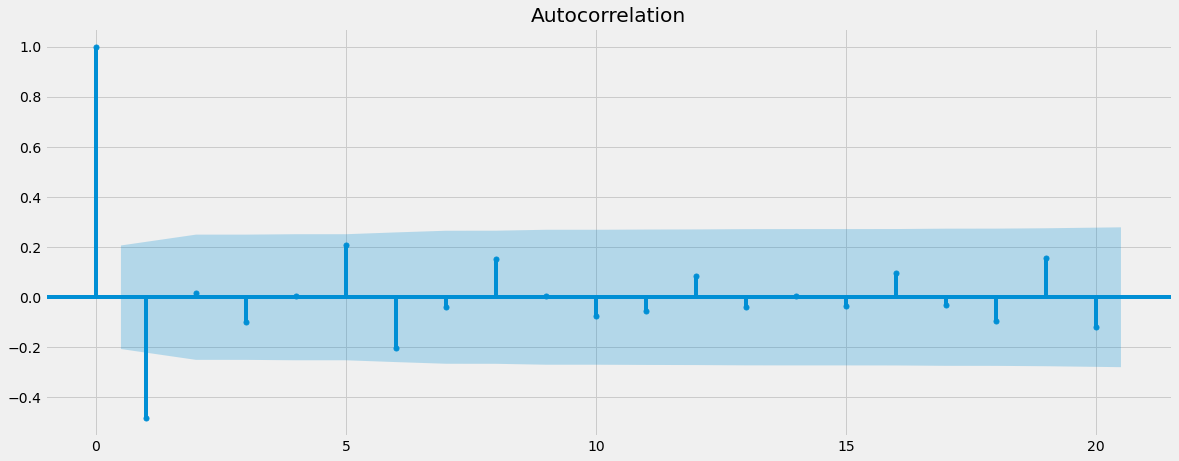

In [27]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

Oh, what happened here? We now do have even more autocorrelated terms.This means that, despite the Dickey-Fuller showing an improvement, the data is still not stationary. We could conduct another round of differencing to stationarize it further and reduce the remaining autocorrelated terms. But, the unspoken rule of thumb is that one need at least ten significant lags (or ten vertical lines above the confidence interval) for a second round of differencing to be necessary. In this case there are only 2 vertical lines above the confidence interval, so we stop here. We already now that the non-stationarity of our data comes from the fact that while I wrote a lot of words over those three months I am investigating, there were also a lot of days when I didn't write a poem at all.